# EN3160 Assignment 2 on Fitting and Alignment
### Rajarathna G.K.M.I.D
### 200500L

1. In this question, using the knowledge on blob detection, i.e., using Laplacian of Gaussians and scale-space
extrema detection, we will detect and draw circles in the sunflower field image. Use the sunflower field
image provided:
im = cv.imread(’images/the_berry_farms_sunflower_field.jpeg’, cv.IMREAD_REDUCED_COLOR_4)
Report the parameters of the largest circles. Report the range of σ values used. You may not use the
cv2.HoughCircles function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Blob detection is used to identify and locate regions or objects within an image that share common properties, such as color, intensity, texture, or shape. These regions are often referred to as "blobs" or "regions of interest." Blob detection is particularly useful for various applications, including object recognition, image segmentation, feature extraction, and tracking.


 **Blob Properties**

   Blobs are typically defined by certain properties that differentiate them from the background or other objects in the image. These properties can include:

   - **Color/Intensity**: Blobs may have similar pixel values in terms of color or grayscale intensity.
   - **Texture**: Blobs might exhibit similar texture patterns or gradients.
   - **Size**: Blobs can vary in size, and the detection algorithm may be set to find blobs of a specific size range.
   - **Shape**: Blobs may have specific shapes, such as circular, elliptical, or irregular.

 **Scale-Space Analysis**

   Scale-space analysis is often used in blob detection. It involves analyzing the image at multiple scales (different levels of blurriness or detail) to detect blobs of various sizes. This helps in capturing blobs that may appear differently at different scales.

**Laplacian of Gaussians (LoG)**

   The LoG is a common filter used for blob detection. It is obtained by applying the Laplacian operator to an image that has been convolved with a Gaussian filter at various scales. The LoG highlights regions of rapid intensity change, which often correspond to blob centers.

**Thresholding and Local Maxima**

   After applying the LoG filter, thresholding is often used to identify potential blob candidates. This process involves setting a threshold value to retain regions with intensity changes above a certain level. The resulting image contains potential blob centers.

**Local Maxima Detection**

   To extract blob centers accurately, the image with potential blob candidates is further processed to find local maxima. This step ensures that only the most prominent blobs are considered, and adjacent points with similar intensities are not mistakenly treated as separate blobs.

 **Post-Processing**
 
   After detecting blob centers, post-processing steps may be applied, such as filtering based on size, removing duplicates, or refining blob boundaries.


Parameters of the largest circle:
Center (x, y): (612, 428)
Radius: 7.0710678118654755
Parameters of the largest circle:
Center (x, y): (538, 422)
Radius: 8.485281374238571
Parameters of the largest circle:
Center (x, y): (448, 485)
Radius: 9.899494936611665
Parameters of the largest circle:
Center (x, y): (606, 478)
Radius: 11.313708498984761
Parameters of the largest circle:
Center (x, y): (379, 481)
Radius: 12.727922061357857
Parameters of the largest circle:
Center (x, y): (105, 345)
Radius: 14.142135623730951
Parameters of the largest circle:
Center (x, y): (106, 346)
Radius: 15.556349186104047


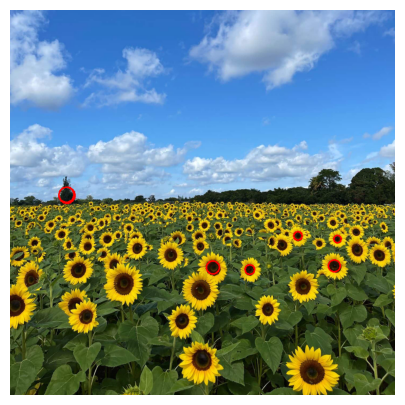

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale
image = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_2)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(figsize=(20,5))
for i in range(5, 12, 1):
    #fig, ax = plt.subplots(2, s, figsize=(20,5))
    scale_space = np.empty((image.shape[0], image.shape[1], 100),dtype=np.float32)
    sigmas = np.arange(i, i+1, 0.01)
    for i, sigma in enumerate(sigmas):
        log_hw = 3*np.max(sigmas)
        X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
        log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
        f_log = cv.filter2D(gray_image, -1, log)
        scale_space[:, :, i] = f_log
        # ax[0, i].imshow(log)
        # ax[0, i].axis('off')
        # ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))    
        # ax[1, i].imshow(f_log)
        # ax[1, i].axis('off')   


    indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
    # print maximum circle's center and radius
    print("Parameters of the largest circle:")
    print("Center (x, y):", (indices[1], indices[0]))
    print("Radius:", np.sqrt(2)*sigmas[indices[2]])
    
    radius = np.sqrt(2)*sigmas[indices[2]]
    # drow the circule at the largest scale
    
    cv.circle(image, (int(indices[1]), int(indices[0])), int(radius), (255, 0, 0), 2)
ax.imshow(image)
ax.axis('off')
plt.show()




-----------------------------
lecture material

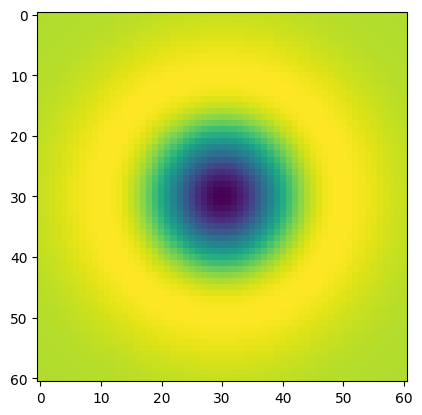

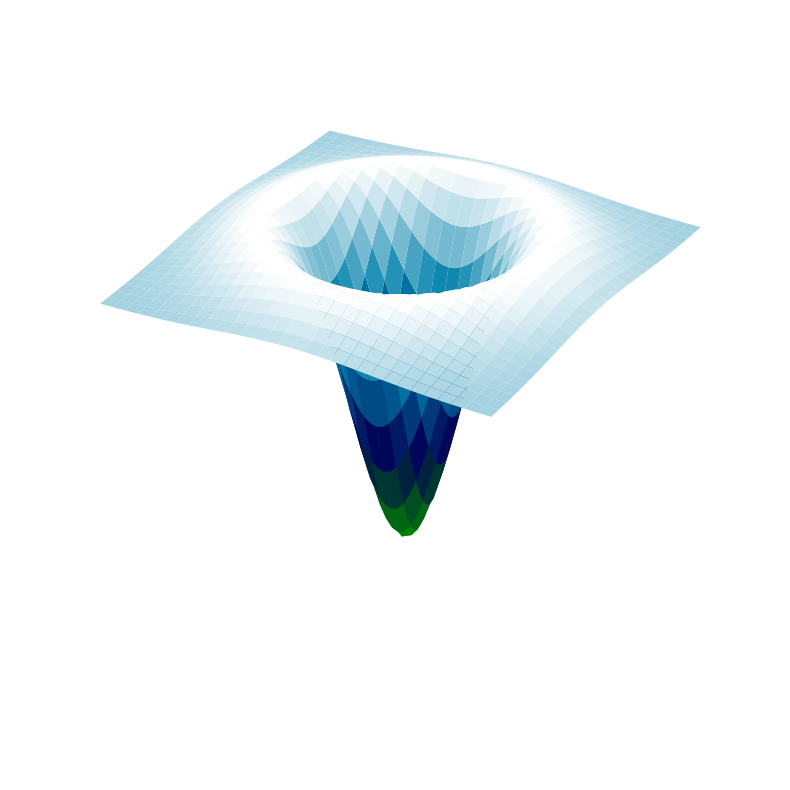

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, log, cmap=cm.ocean, linewidth = 0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

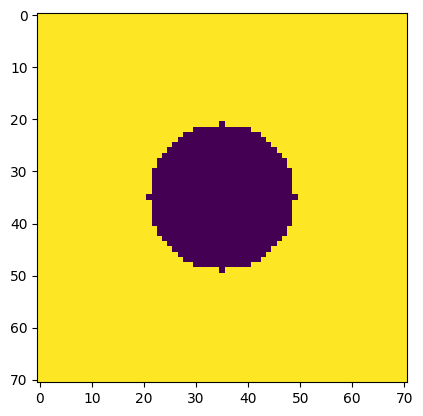

In [12]:
# Generating the circle
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w, h = 71, 71
hw, hh = w//2, h//2
f = np.ones((h,w), dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5 # 14
f *= X**2 + Y**2 >  r**2
plt.imshow(f)

(35, 35, 5)
10


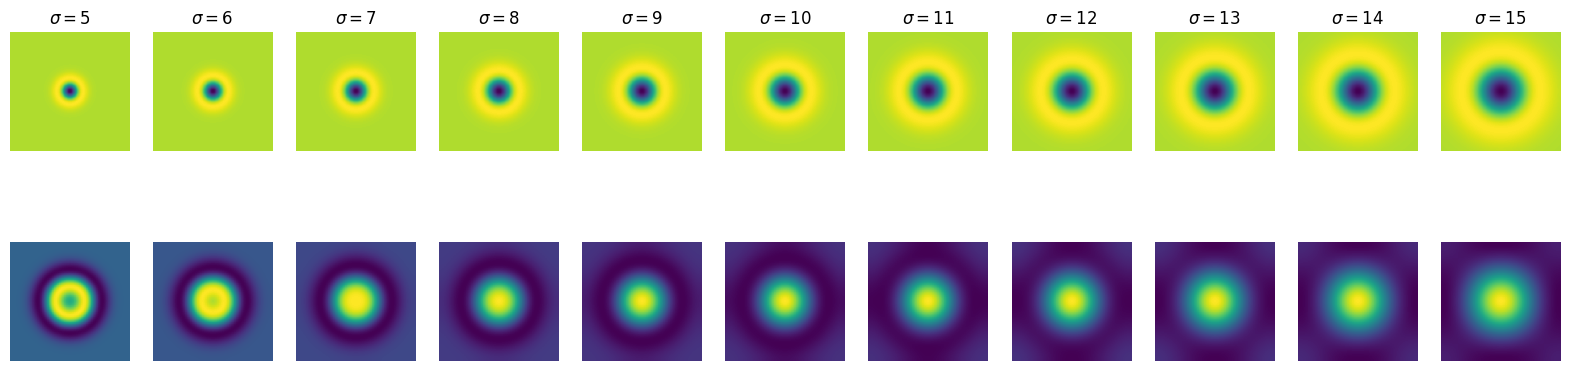

In [13]:
s = 11
fig, ax = plt.subplots(2, s, figsize=(20,5))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))    
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')   

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices) # r = \sqrt{2}*sigma 
print(sigmas[indices[2]])

----------------------------------


quection 02

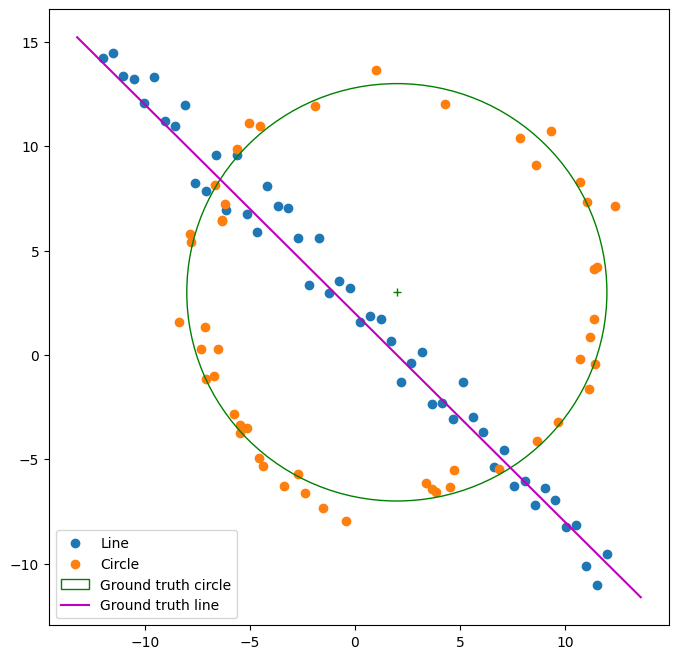

In [53]:
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np

# Set a random seed for reproducibility
np.random.seed(0)

# Define the total number of points
N = 100

# Calculate half of the number of points
half_n = N // 2

# Define parameters for a circle
r = 10  # Radius
x0_gt, y0_gt = 2, 3  # Center coordinates
s = r / 16  # Standard deviation for noise
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Define parameters for a line
s = 1.  # Standard deviation for noise
m, b = -1, 2  # Slope and y-intercept of the line
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine points from both the circle and the line
all_points = np.vstack((X_circ, X_line))
x_all = all_points[:, 0]
y_all = all_points[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot for points on the line
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')

# Scatter plot for points on the circle
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

# Plot the ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
x0_initial = x0_gt
y0_initial = y0_gt
r_initial = r



ax.plot((x0_gt), (y0_gt), '+', color='g')

# Define x-values for the ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])

# Calculate y-values for the ground truth line
y_ = m * x_ + b

y_initial = y_
x_initial = x_
m_initial = m
b_initial = b

# Plot the ground truth line
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()
plt.show()


consensus: 54
outliers: 46
d 100


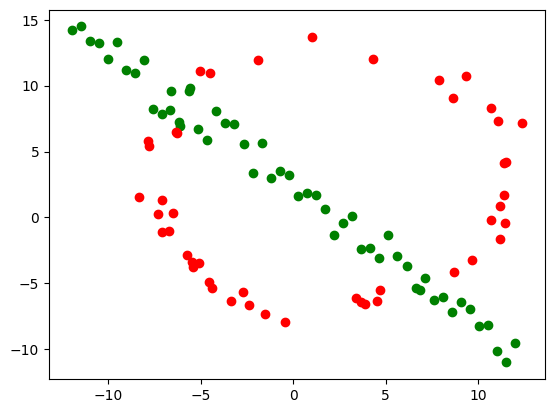

m, c: -1.0308850964382035 2.271133961749208


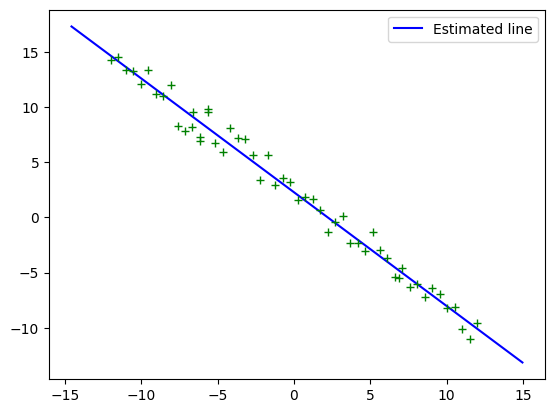

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg


def ransac_line(x1,y1):
    # find line parameters
    m = (y1[1] - y1[0])/(x1[1] - x1[0])
    c = y1[0] - m*x1[0]
    a = -m
    b = 1
    #normalise
    d1 = np.sqrt(a**2 + b**2)
    a = a/d1
    b = b/d1
    d = np.abs(a*x_all+ b*y_all - d1)/np.sqrt(a**2 + b**2)
    return a, b, d,c




threshold = 1.7 # Threshold for inliers
s = 2 # Number of samples for line fitting
loop = True 
#inliers = []


i=0
j=0
while loop:
    
    
    
    for i in range(len(all_points)):
        d = []
        
        
        # Randomly select 2 points
        idx = np.random.randint(0, len(x), s)
        xs = x[idx]
        ys = y[idx]
        a, b, d, c = ransac_line(xs, ys)
        #print("a, b, d:", a, b, d)
        outliers = []
        consensus = []
        for k in range(len(d)):
            if d[k]< threshold:
                consensus.append((x_all[k], y_all[k]))
            else:
                outliers.append((x_all[k], y_all[k]))
        print("consensus:", len(consensus))
        print("outliers:", len(outliers))       


        
        if (len(consensus) > 45):

            print("d", len(d))
            loop = False
            
            break
        i+=1
        


    j+=1
    if j > 1000:
        print("j:", j)
        loop = False
    

    
# plot consensus points in green and outliers in red

xc = np.array([p[0] for p in consensus])
xc_l = xc
yc = np.array([p[1] for p in consensus])
yc_l = yc
xo = np.array([q[0] for q in outliers])
yo = np.array([q[1] for q in outliers])
plt.scatter(xc, yc, color='g')
plt.scatter(xo, yo, color='r')
plt.show()

#estimate line parameters using all consensus points
m, c = np.polyfit(xc, yc, 1)
print("m, c:", m, c)
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + c
plt.plot(x_, y_, color='b', label='Estimated line')
plt.plot((xc), (yc), '+', color='g')
plt.legend()
plt.show()






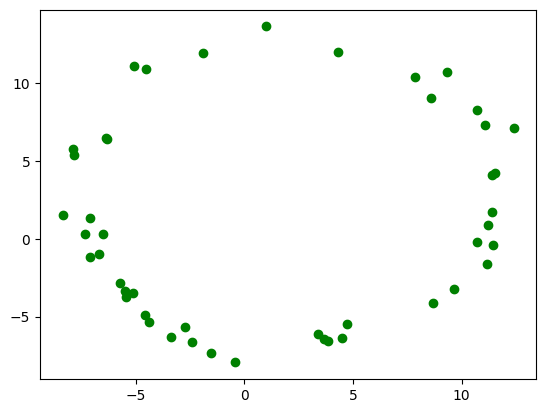

In [55]:
circle_= outliers
# plot the circle
xc = np.array([p[0] for p in circle_])
yc = np.array([p[1] for p in circle_])
plt.scatter(xc, yc, color='g')
plt.show()


xs: [-5.73249084 -6.30877504 -6.34152069] ys: [-2.82575284  6.43627445  6.48394589]
inliers: 8
outliers: 37
xs: [11.05786244 -5.05274181 -5.73249084] ys: [ 7.33454976 11.13161333 -2.82575284]
inliers: 44
outliers: 1


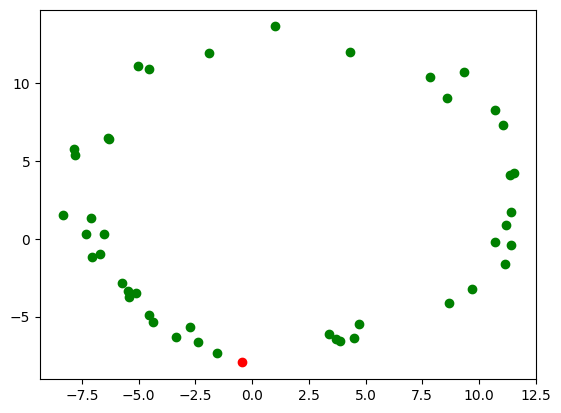

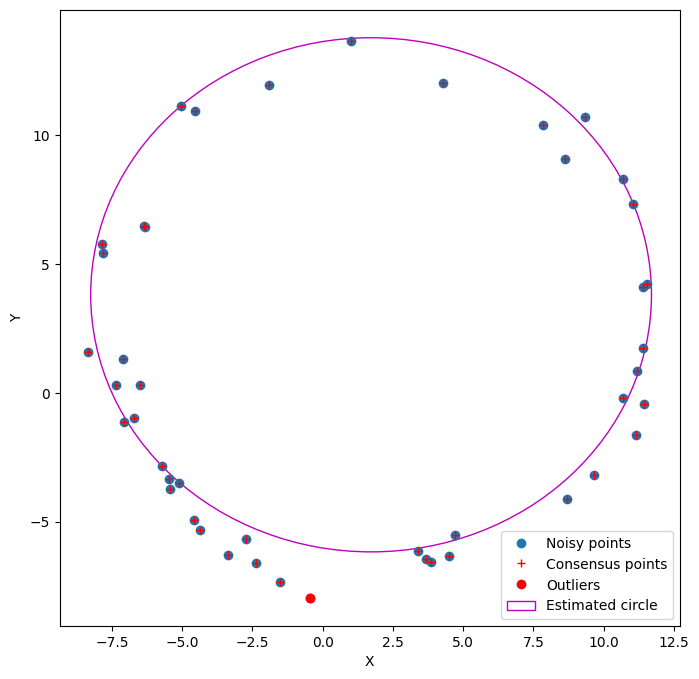

estimated circle parameters: center (x, y): (1.7235513812991181, 3.8063599804050092) radius: 9.978851942008907


In [59]:
# update the x_all and y_all
x_all = xc
y_all = yc
def ransac_circle(x1, y1):
    # Find circle parameters
    xa, xb, xc = x1
    ya, yb, yc = y1
    
    A = np.array([[2*xa, 2*ya, 1], [2*xb, 2*yb, 1], [2*xc, 2*yc, 1]])
    b = np.array([xa**2 + ya**2, xb**2 + yb**2, xc**2 + yc**2])

    
    inv_A = np.linalg.inv(A)
    x0 = np.dot(inv_A[0], b)
    y0 = np.dot(inv_A[1], b)

    r = np.sqrt((x0 - xa)**2 + (y0 - ya)**2)
    
    d = np.abs(np.sqrt((x_all - x0)**2 + (y_all - y0)**2) - r)
    return x0, y0, r, d


threshold = 1.7  # Threshold for inliers
s = 3  # Number of samples for circle fitting
loop = True
i = 0
j = 0

while loop:
    
    for i in range(len(xc)):
        d = []
        
        # Randomly select 3 points
        idx = np.random.randint(0, len(x_all), s)
        xs = x_all[idx]
        ys = y_all[idx]
        print("xs:", xs, "ys:", ys)
        x0, y0, r, d = ransac_circle(xs, ys)
        outliers = []
        inliers = []
        
        for k in range(len(d)):
            if d[k] < threshold:
                inliers.append((x_all[k], y_all[k]))
            else:
                outliers.append((x_all[k], y_all[k]))
        print("inliers:", len(inliers))
        print("outliers:", len(outliers))
        

        if len(inliers) > 40:
            loop = False
            break
        i += 1

    j += 1
    if j > 1000:
        loop = False

# plot consensus points in green and outliers in red

xc = np.array([p[0] for p in inliers])
yc = np.array([p[1] for p in inliers])
xo = np.array([q[0] for q in outliers])
yo = np.array([q[1] for q in outliers])
plt.scatter(xc, yc, color='g')
plt.scatter(xo, yo, color='r')
plt.show()

# Convert inliers to a NumPy array
inliers_array = np.array(inliers)

# Plot the noisy points and the estimated circle
plt.figure(figsize=(8, 8))
plt.plot(x_all, y_all, 'o', label='Noisy points')
plt.plot(xc, yc, '+', color='r', label='Consensus points')
plt.plot(xo, yo, 'o', color='r', label='Outliers')
circle_estimated = plt.Circle((x0, y0), r, color='m', fill=False, label='Estimated circle')
ax = plt.gca()
ax.add_patch(circle_estimated)
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("estimated circle parameters:" ,  "center (x, y):", (x0, y0), "radius:", r)





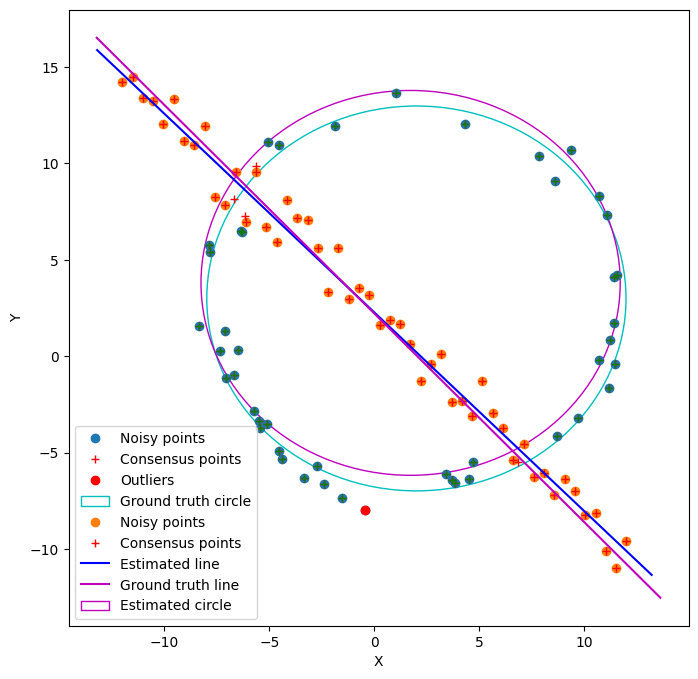

In [61]:
# plot all points and the estimated circle with the ground truth circle and line with the ground truth line

plt.figure(figsize=(8, 8))
plt.plot(x_all, y_all, 'o', label='Noisy points')
plt.plot(xc, yc, '+', color='r', label='Consensus points')
plt.plot(xo, yo, 'o', color='r', label='Outliers')



#plot the circle ground truth
circle_estimated = plt.Circle((x0_gt , y0_gt ) , r , color= 'c' , fill =False , label= 'Ground truth circle')
ax = plt.gca()
ax.add_patch(circle_estimated)

circle_estimated = plt.Circle((x0, y0), r, color='m', fill=False, label='Estimated circle')

# plot all points 
plt.plot(x, y, 'o', label='Noisy points')
plt.plot(xc_l, yc_l, '+', color='r', label='Consensus points')

# plot the generated line with the ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + c
plt.plot(x_, y_, color='b', label='Estimated line')
plt.plot((xc), (yc), '+', color='g')





# plot the ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_initial = m_initial * x_ + b_initial
plt.plot(x_initial, y_initial, color='m', label='Ground truth line')





plt.plot()
ax = plt.gca()
ax.add_patch(circle_estimated)
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



------------------------------------------------------
quection 3

In [75]:
import cv2 as cv
import numpy as np

def select_corresponding_points(image_architectural, image_flag):
    # Find points on the architectural image that correspond to the flag image
    corresponding_points = []

    def click_event(event, x, y, flags, param):
        nonlocal corresponding_points
        if event == cv.EVENT_LBUTTONDOWN:
            corresponding_points.append((x, y))
            cv.circle(image_architectural, (x, y), 5, (0, 0, 255), -1)
            cv.imshow('Architectural Image', image_architectural)
            if len(corresponding_points) == 4:
                cv.destroyAllWindows()

    cv.imshow('Architectural Image',image_architectural)
    cv.setMouseCallback('Architectural Image', click_event)

    while len(corresponding_points) < 4:
        cv.waitKey(1)

    points_architectural = np.array(corresponding_points, dtype=np.float32)

    width_flag = image_flag.shape[1]
    height_flag = image_flag.shape[0]
    points_flag = np.array([[0, 0], [width_flag, 0], [width_flag, height_flag], [0, height_flag]], dtype=np.float32)

    return points_architectural, points_flag

def superimpose_images_with_homography(architectural_image, flag_image, points_architectural, points_flag, alpha, beta):
    # Calculate the homography matrix
    homography_matrix = cv.findHomography(points_flag, points_architectural)[0]

    # Warp the flag image to fit the architectural image
    flag_image_warped = cv.warpPerspective(flag_image, homography_matrix, (architectural_image.shape[1], architectural_image.shape[0]))

    # Blend the two images
    blended_image = cv.addWeighted(architectural_image, alpha, flag_image_warped, beta, 0)

    return blended_image

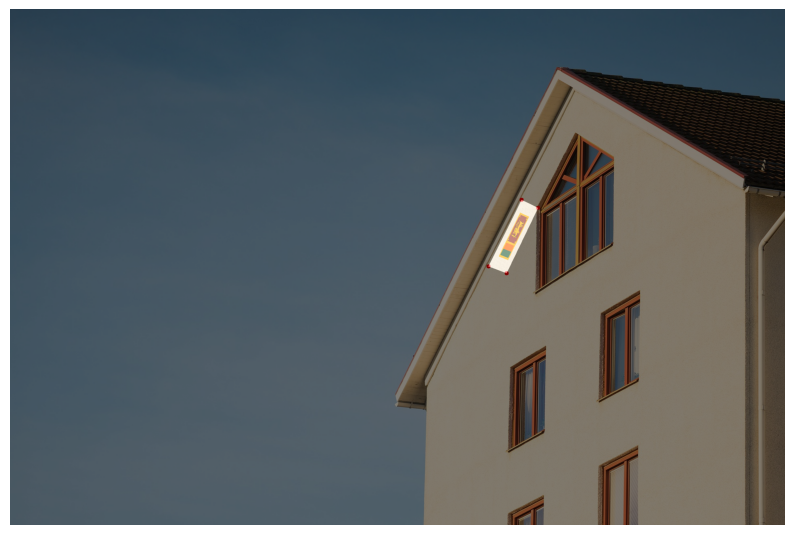

In [78]:
image1 = cv.imread('building1.jpg')
image2 = cv.imread('flag.png')
points1, points2 = select_corresponding_points(image1, image2)
blended_image = superimpose_images_with_homography(image1, image2, points1, points2, 0.5, 0.5)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


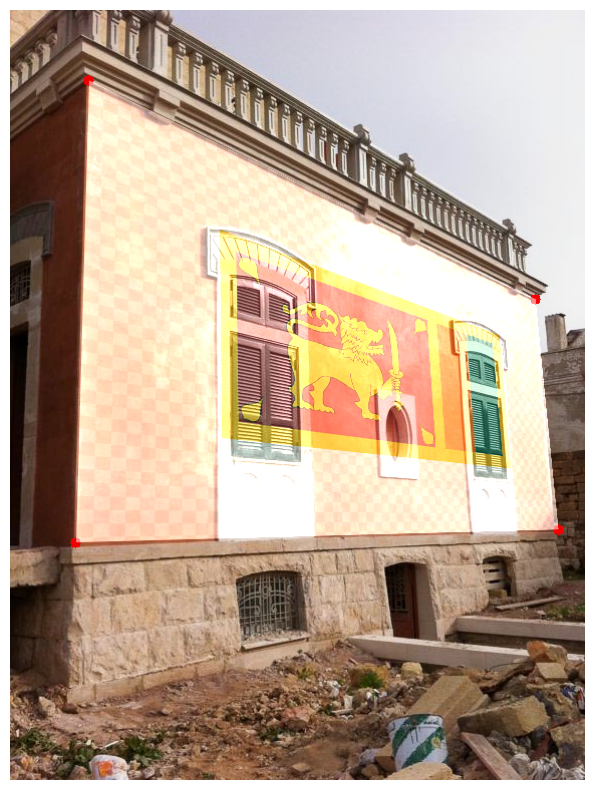

In [81]:
image1 = cv.imread('building2.jpg')
image2 = cv.imread('flag.png')
points1, points2 = select_corresponding_points(image1, image2)
blended_image = superimpose_images_with_homography(image1, image2, points1, points2, 0.95, 0.55)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


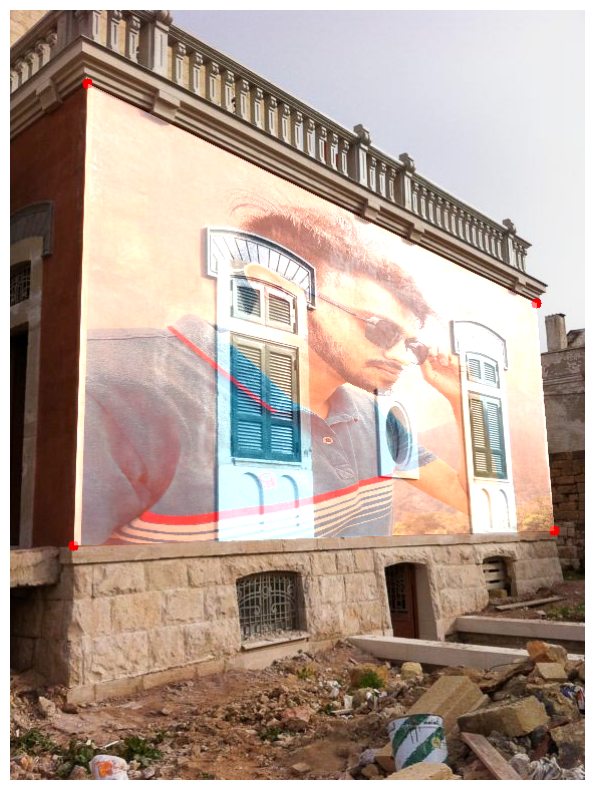

In [82]:
image1 = cv.imread('building2.jpg')
image2 = cv.imread('prop 1.jpg')
points1, points2 = select_corresponding_points(image1, image2)
blended_image = superimpose_images_with_homography(image1, image2, points1, points2, 0.95, 0.55)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


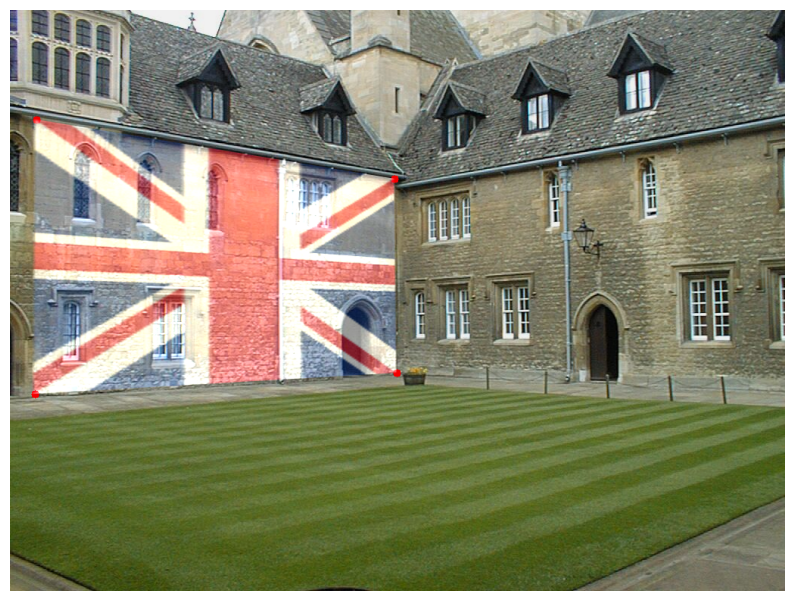

In [83]:
image1 = cv.imread('001.jpg')
image2 = cv.imread('flag2.png')
points1, points2 = select_corresponding_points(image1, image2)
blended_image = superimpose_images_with_homography(image1, image2, points1, points2, 0.95, 0.55)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


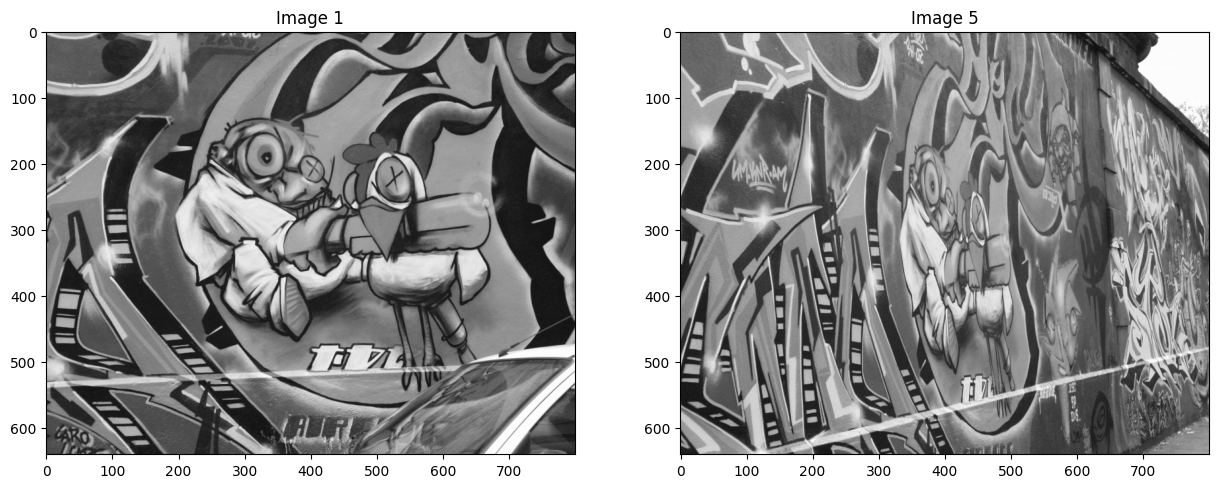

good_matches [< cv2.DMatch 000001E6B1BA4090>, < cv2.DMatch 000001E6B1BA7670>, < cv2.DMatch 000001E6B1BA76D0>, < cv2.DMatch 000001E6B1C0C310>, < cv2.DMatch 000001E6B1C0EA70>, < cv2.DMatch 000001E6B1C0FF50>, < cv2.DMatch 000001E6B1C0E970>, < cv2.DMatch 000001E6B1C0DA10>, < cv2.DMatch 000001E6B1C0F510>, < cv2.DMatch 000001E6B1C0FA90>, < cv2.DMatch 000001E6B1C0E310>, < cv2.DMatch 000001E6B1C0E730>, < cv2.DMatch 000001E6B0B774B0>, < cv2.DMatch 000001E6B0B776D0>, < cv2.DMatch 000001E6B0B83E10>, < cv2.DMatch 000001E6B0B80610>, < cv2.DMatch 000001E6B0B81890>, < cv2.DMatch 000001E6B0B803D0>, < cv2.DMatch 000001E6B13A0390>, < cv2.DMatch 000001E6B13A2FF0>, < cv2.DMatch 000001E6B0BED110>, < cv2.DMatch 000001E6B0BECD70>, < cv2.DMatch 000001E6B0BED0B0>, < cv2.DMatch 000001E6B0BEFDB0>, < cv2.DMatch 000001E6B0BEEBF0>, < cv2.DMatch 000001E6B0BEEC50>, < cv2.DMatch 000001E6B0BEDE90>, < cv2.DMatch 000001E6B0BEE530>, < cv2.DMatch 000001E6B0B64F90>, < cv2.DMatch 000001E6B0B64730>, < cv2.DMatch 000001E6B0B67

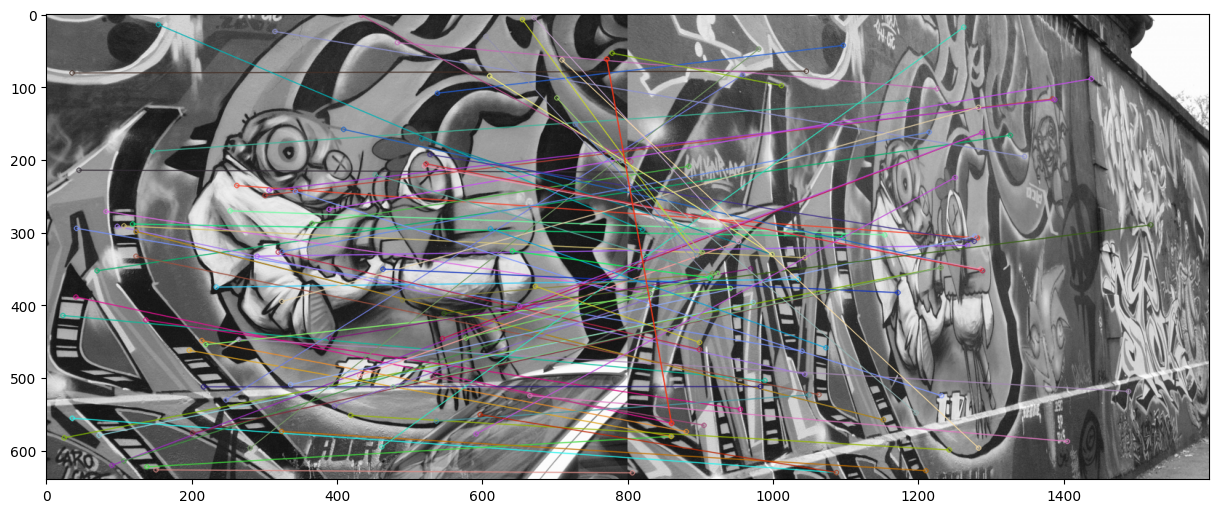

In [89]:

image_path1 = 'img1.ppm'
image_path5 = 'img5.ppm'

# Read the images in grayscale
image1 = cv.imread(image_path1, cv.IMREAD_GRAYSCALE)
image5 = cv.imread(image_path5, cv.IMREAD_GRAYSCALE)

# Create a SIFT detector
sift_detector = cv.SIFT_create()

# Detect keypoints and compute descriptors for the first image
keypoints1, descriptors1 = sift_detector.detectAndCompute(image1, None)

# Detect keypoints and compute descriptors for the second image
keypoints5, descriptors5 = sift_detector.detectAndCompute(image5, None)

# Create a brute-force matcher
bf_matcher = cv.BFMatcher()

# Match descriptors between the two images
matches = bf_matcher.knnMatch(descriptors1, descriptors5, k=2)

# Apply Lowe's ratio test to select good matches
good_matches = []
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good_matches.append(match1)

# Draw the matches
matched_image = cv.drawMatches(image1, keypoints1, image5, keypoints5, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches and original images
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
ax1.set_title('Image 1')
ax2.imshow(cv.cvtColor(image5, cv.COLOR_BGR2RGB))
ax2.set_title('Image 5')
plt.show()

fig2, ax = plt.subplots(figsize=(15, 15))
ax.imshow(matched_image)

print("good_matches",good_matches)


In [91]:
# Compute the homography using my own code within RANSAC and compare with the homography given in the dataset.
print("number of good_matches",len(good_matches))


number of good_matches 87


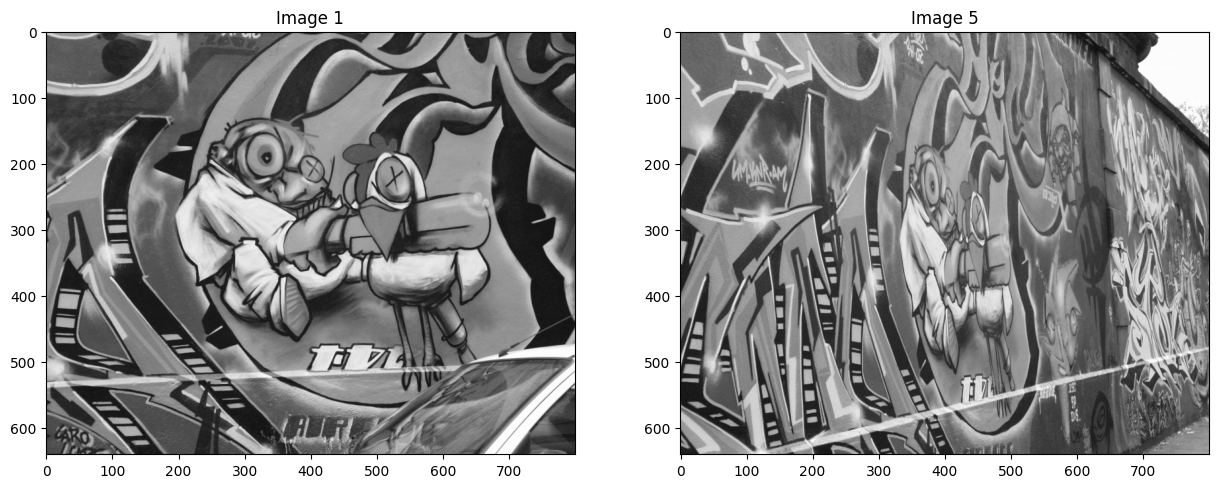

final homography [[-1.20540962e-01 -3.33150818e-01  1.13459649e+02]
 [-3.72551868e-01 -9.66907229e-01  3.43500660e+02]
 [-1.08363963e-03 -2.74031830e-03  1.00000000e+00]]


In [93]:
import random
# Draw Original Images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
ax1.set_title('Image 1')
ax2.imshow(cv.cvtColor(image5, cv.COLOR_BGR2RGB))
ax2.set_title('Image 5')
plt.show()

# Initialize RANSAC Variables

iterations = 1000
threshold = 100
homograpy = None
inliers = [] #keep track of the best homography and its corresponding inliers

# RANSAC

for i in range(iterations):
    # Randomly select 4 correspondences (matches) as a sample from good_matches
    sample = random.sample(good_matches, 4)
    #Extract the keypoints' coordinates for these samples from both img1 and img5
    img1_pts = np.float32([keypoints1[m.queryIdx].pt for m in sample])
    img5_pts = np.float32([keypoints5[m.trainIdx].pt for m in sample])

    # Compute the homography using the 4 correspondences using RANSAC, based on the sampled correspondences.
    H = cv.findHomography(img1_pts, img5_pts,cv.RANSAC, threshold)

    # Apply the computed homography to all keypoints in img1
    transformed_img1_pts = cv.perspectiveTransform(np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2), H[0])

    # count inliers and brake if suitable homography is found
    mid_inliers = []
    for i in range(len(good_matches)):
        if np.linalg.norm(transformed_img1_pts[i] - np.float32([keypoints5[m.trainIdx].pt for m in good_matches])[i]) < threshold:
            mid_inliers.append(good_matches[i])
    
    if len(mid_inliers) > len(inliers):
        inliers = mid_inliers
        homograpy = H[0]

    #break if suitable homography is found
    if len(inliers) > len(good_matches) * 0.9:
        break

print("final homography", homograpy)

    








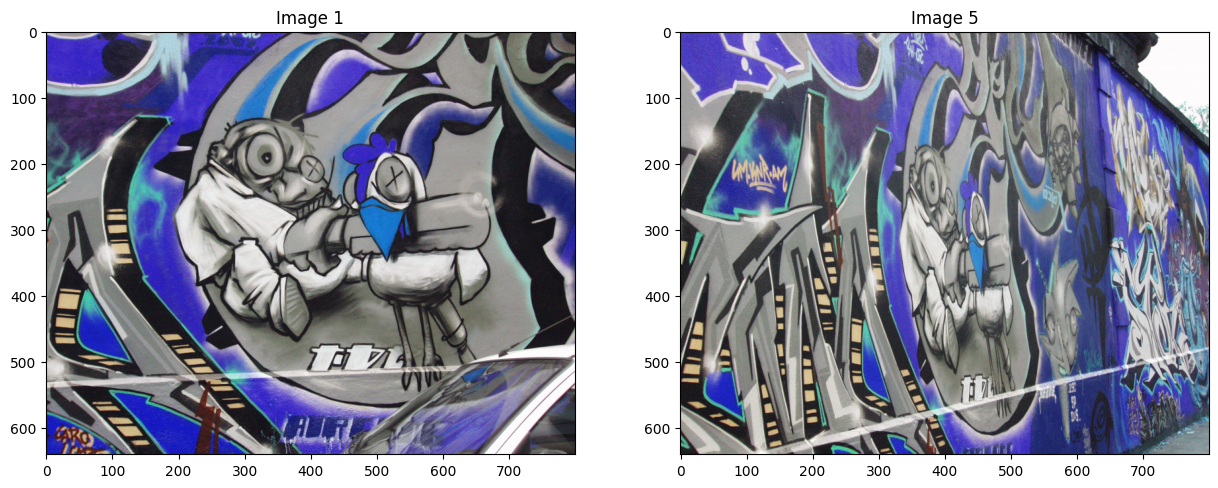

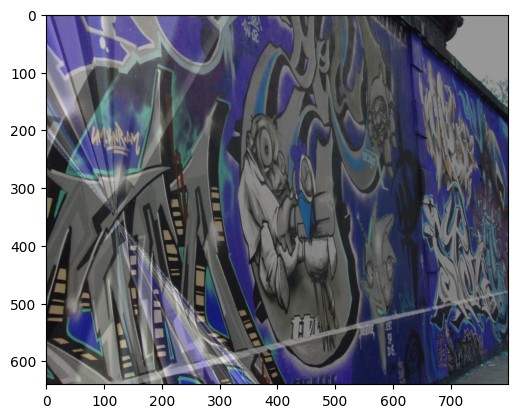

In [94]:
# Load the color versions of the images
img1 = cv.imread('img1.ppm')
img5 = cv.imread('img5.ppm')

# Apply the homography to img1 to align it with img5
stitched_image = cv.warpPerspective(img1, homograpy, (img5.shape[1], img5.shape[0]))

# Blend the two images (simple alpha blending)
alpha = 0.4  # You can adjust the blending factor
blended_image = cv.addWeighted(img5, 1 - alpha, stitched_image, alpha, 0)

# Display the stitched and blended image and the original images
fig1 , (ax1, ax2 ) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(img1)
ax1.set_title('Image 1')
ax2.imshow(img5)
ax2.set_title('Image 5')
plt.show()

fig2 , ax = plt.subplots()
ax.imshow(blended_image)